In [22]:
#lets make a deal.
import random
import numpy as np

nruns=10001  #times game will be played
stayw=0
switchw=0
stayl=0
switchl=0 
stay=0
switch=0

for i in range(nruns):
    doors = [1,2,3] #number of doors to choose from 
    prize = np.random.choice(doors) #prize 
    pick1 = np.random.choice(doors) #player picks door

    doors.remove(prize) #keeps prize door 
    
    if pick1 != prize: 
        doors.remove(pick1) #remove the door that was picked

    show = random.choice(doors)
    
    if (random.random() > 0.5): #switch time
        doors = [1,2,3]
        doors.remove(show) #take away 1 door
        doors.remove(pick1) #take away 1 door
        pick2 = doors[0] #player picks
        if (pick2 == prize):
            switchw+= 1
            switch +=1
        else:
            switchl+= 1
            switch += 1
    else:
        if pick1 == prize:
            stayw+=1
            stay+=1
        else:
            stayl+=1
            stay+=1

#percent for switch & stay.
per_stay = (((stayw)/stay)*100) #percent of staying 
per_switch = (((switchw)/(switch))*100)  #percent of switching 

print("staying =", per_stay, "%")
print("switching =", per_switch, "%")

staying = 33.22778547397586 %
switching = 65.82457558609539 %


In [4]:
#Atom Decay
import numpy as np
import random
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Bi=10000   # Starting amount
Tl=0       
Pb=0      
Bis=0
tmax=20000   #total time in (s)
h=1.0        #time step (s)

pdBi = 1 - 2**(-h/(46*60))  #probability of decaying 
pdTl = 1 - 2**(-h/(2.2*60))
pdPb = 1 - 2**(-h/(3.3*60))

time = np.arange(0.0,tmax,h) #empty arrays 
Bi_num = []
Tl_num = []
Pb_num = []
Bis_num = []

for t in time: 
    Bi_num.append(Bi)
    Tl_num.append(Tl)
    Pb_num.append(Pb)
    Bis_num.append(Bis)
    
    decay = 0   #number of decayed atoms
    decayTl = 0
    decayPb = 0 
    decayBi = 0
    
    for a in range(Pb):
        if (random.random() < pdPb):
            decayBi += 1
    Pb -= decayBi
    Bis += decayBi
    
    for b in range(Tl):
        if (random.random() < pdTl):
            decayTl += 1
    Tl -= decayTl
    Pb += decayPb
    
    for c in range(Bi):
        if (random.random() < pdBi):
            decay +=1
            if (random.random() < 0.9791):
                decayPb += 1
            else:
                decayTl += 1
    Bi -= decay
    Tl += decayTl
    Pb += decayPb

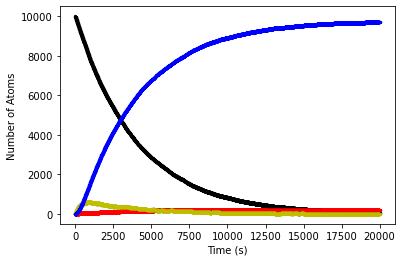

In [5]:
#plot graph of Atom decay    
fig = plt.figure()
ax =fig.add_subplot(111)

#items being plotted 
ax.scatter(time,Bi_num, s=5, c='k', alpha=0.3)
ax.scatter(time,Tl_num, s=5, c='r', alpha=0.3)
ax.scatter(time,Pb_num, s=5, c='y', alpha=0.3)
ax.scatter(time,Bis_num, s=5, c='b', alpha=0.3)

#lable axis
ax.set_xlabel("Time (s)", size=10)
ax.set_ylabel("Number of Atoms", size=10)

#scale
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)